In [35]:
library(tidyverse)
library(lubridate)
library(ggplot2)
library(readr)
plastic_waste <- readr::read_csv("/content/plastic-waste.csv")

Rows: 240 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): code, entity, continent
dbl (7): year, gdp_per_cap, plastic_waste_per_cap, mismanaged_plastic_waste_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Exercise 1 (10 pts)

Verify that the dataset has loaded into the Environment.
How many observations are in the dataset?

In [23]:
# Gözlem sayısını kontrol et
cat("Gözlem Sayısı: ", nrow(plastic_waste), "\n")

# Eksik değer kontrolü
missing_values <- colSums(is.na(plastic_waste))
print(missing_values)

Gözlem Sayısı:  240 
                            code                           entity 
                               0                                0 
                       continent                             year 
                               0                                0 
                     gdp_per_cap            plastic_waste_per_cap 
                              45                               51 
mismanaged_plastic_waste_per_cap         mismanaged_plastic_waste 
                              51                               51 
                     coastal_pop                        total_pop 
                              51                               10 


- Have a quick look at the data and notice that there are cells taking the value `NA` -- what does this mean?

Veri görselleştirmede NA (Not Available), bir veri setindeki eksik veya mevcut olmayan değerleri ifade eder.Bu durum, anketlerde soruların atlanması, veri girişi sırasında yapılan hatalar, veri kayıpları veya sensör ve cihaz hatalarından kaynaklı olabilir.

- Create the distribution of plastic waste per capita in 2010.

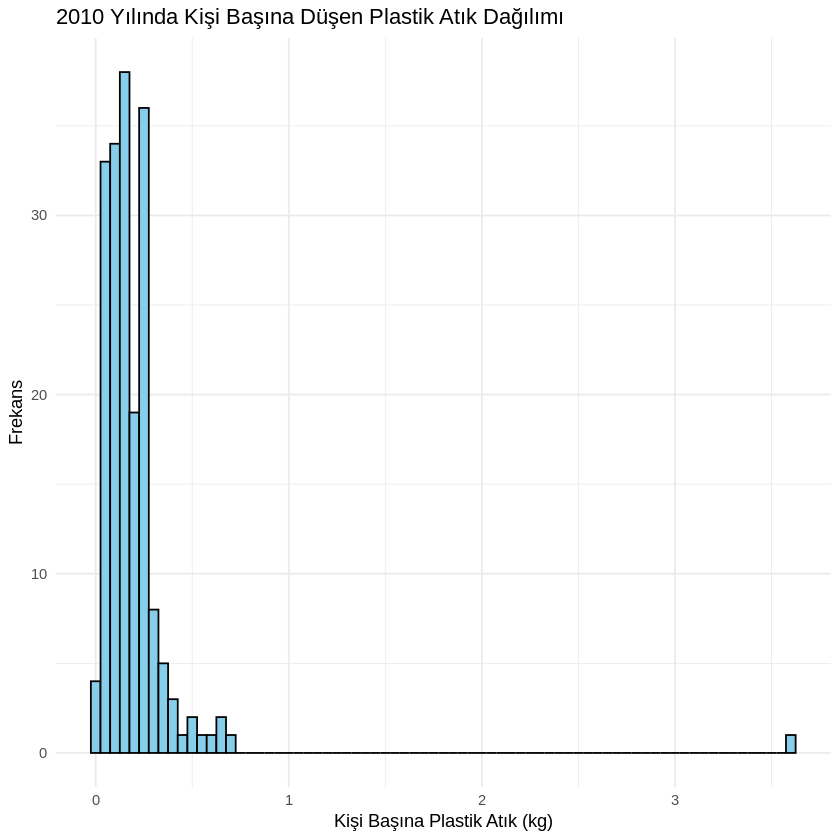

In [34]:
# Gerekli kütüphaneleri yükleyin
library(dplyr)
library(ggplot2)

# Sütun isimlerini yeniden adlandır (eğer henüz yapmadıysanız)
colnames(plastic_waste) <- c(
  "Code",                      # Ülke kodu
  "Country",                   # Ülke ismi
  "Continent",                 # Kıta
  "Year",                      # Yıl
  "GdpPerCapita",              # Kişi başına düşen GSYİH
  "PlasticWastePerCapita_2010",# 2010 kişi başına plastik atık
  "MismanagedPlasticWastePerCap", # Ek veri sütunu
  "MismanagedPlasticWaste",    # Ek veri sütunu
  "CoastalPop",                # Ek veri sütunu
  "TotalPop"                   # Toplam nüfus
)

# Sütunu sayısal türe dönüştür
plastic_waste$PlasticWastePerCapita_2010 <- as.numeric(plastic_waste$PlasticWastePerCapita_2010)

# Eksik (NA) değerleri filtreleyerek kaldır
plastic_waste <- plastic_waste %>% filter(!is.na(PlasticWastePerCapita_2010))

# 2010 yılı kişi başına plastik atık dağılımını gösteren histogram
ggplot(data = plastic_waste, aes(x = PlasticWastePerCapita_2010)) +
  geom_histogram(binwidth = 0.05, fill = "skyblue", color = "black") + # Daha küçük bir bin genişliği
  labs(
    title = "2010 Yılında Kişi Başına Düşen Plastik Atık Dağılımı",
    x = "Kişi Başına Plastik Atık (kg)",
    y = "Frekans"
  ) +
  theme_minimal()


## Exercise 2 (20 pts)

- Plot, using histograms, the distribution of plastic waste per capita faceted by continent.

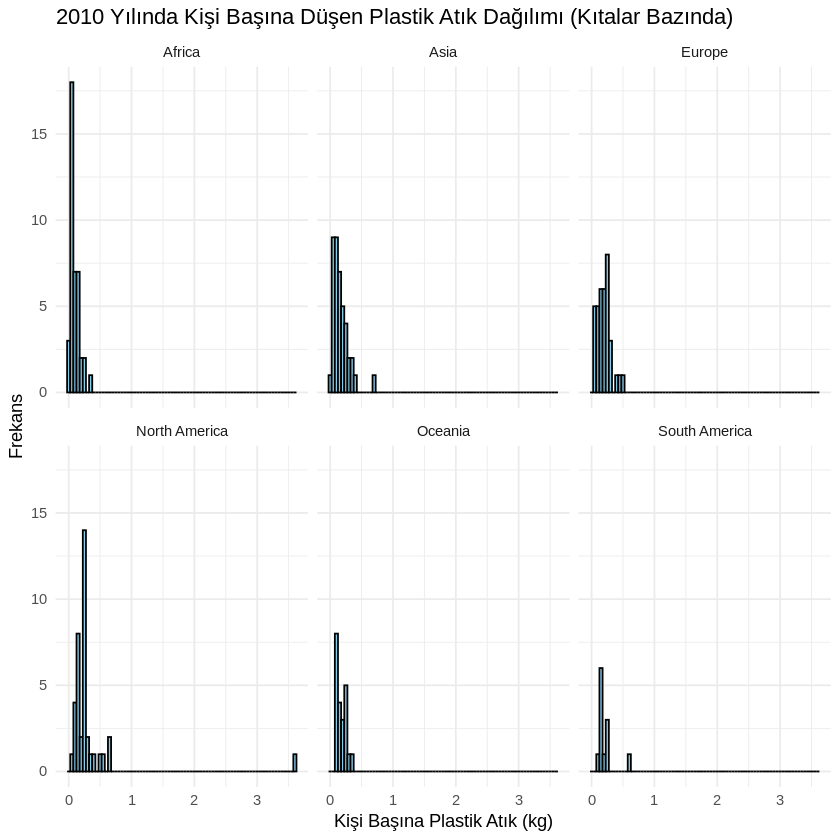

In [37]:
# Kütüphaneleri yükle (eğer daha önce yüklenmediyse)
library(dplyr)
library(ggplot2)

# Sütun isimlerini yeniden adlandır (eğer henüz yapmadıysanız)
colnames(plastic_waste) <- c(
  "Code",                      # Ülke kodu
  "Country",                   # Ülke ismi
  "Continent",                 # Kıta
  "Year",                      # Yıl
  "GdpPerCapita",              # Kişi başına düşen GSYİH
  "PlasticWastePerCapita_2010",# 2010 kişi başına plastik atık
  "MismanagedPlasticWastePerCap", # Ek veri sütunu
  "MismanagedPlasticWaste",    # Ek veri sütunu
  "CoastalPop",                # Ek veri sütunu
  "TotalPop"                   # Toplam nüfus
)

# İlgili sütunu sayısal türe dönüştür
plastic_waste$PlasticWastePerCapita_2010 <- as.numeric(plastic_waste$PlasticWastePerCapita_2010)

# Eksik (NA) değerleri filtreleyerek kaldır
plastic_waste <- plastic_waste %>% filter(!is.na(PlasticWastePerCapita_2010))

# Histogramı kıtalara göre facet'leyerek oluşturun
ggplot(data = plastic_waste, aes(x = PlasticWastePerCapita_2010)) +
  geom_histogram(binwidth = 0.05, fill = "skyblue", color = "black") + # Bin genişliğini gerektiği gibi ayarlayın
  labs(
    title = "2010 Yılında Kişi Başına Düşen Plastik Atık Dağılımı (Kıtalar Bazında)",
    x = "Kişi Başına Plastik Atık (kg)",
    y = "Frekans"
  ) +
  theme_minimal() +
  facet_wrap(~ Continent) # Kıtaya göre facetleme


- What can you say about how the continents compare to each other in terms of their plastic waste per capita?

Kıtalar arasında kişi başına düşen plastik atık miktarını incelediğimizde, gelişmiş kıtalar (örneğin Avrupa ve Kuzey Amerika) genellikle daha yüksek plastik atık üretimine sahiptir. Bu durum, yüksek tüketim alışkanlıkları ve sanayileşmiş yaşam tarzlarıyla ilişkilendirilebilir. Buna karşılık, Asya ve Afrika gibi gelişmekte olan veya az gelişmiş kıtalar, genellikle daha düşük kişi başına plastik atık üretirler. Bununla birlikte, yanlış yönetilen atıklar ve deniz kirliliği gibi sorunlar bu bölgelerde daha ciddi bir tehdit oluşturabilir. Sonuç olarak, plastik atık miktarındaki bu farklar, ekonomik durum, tüketim alışkanlıkları ve atık yönetim sistemleriyle doğrudan ilişkilidir.

## Exercise 3 (30 pts)

Remember that a data visualisation is just a pretty picture unless you know what the visualisation is about, so it is important to add axis labels and a title. Edit your code with a suitable title and axis labels. Try to be as clear as possible !

For some further illustration,

- Pick another single numerical variable and make a histogram.

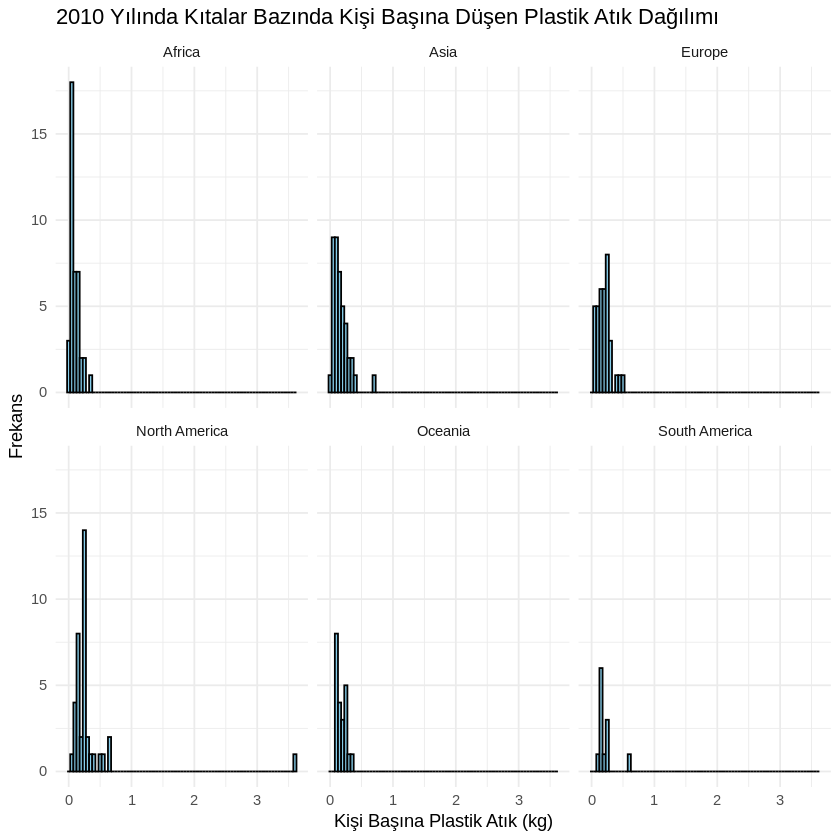

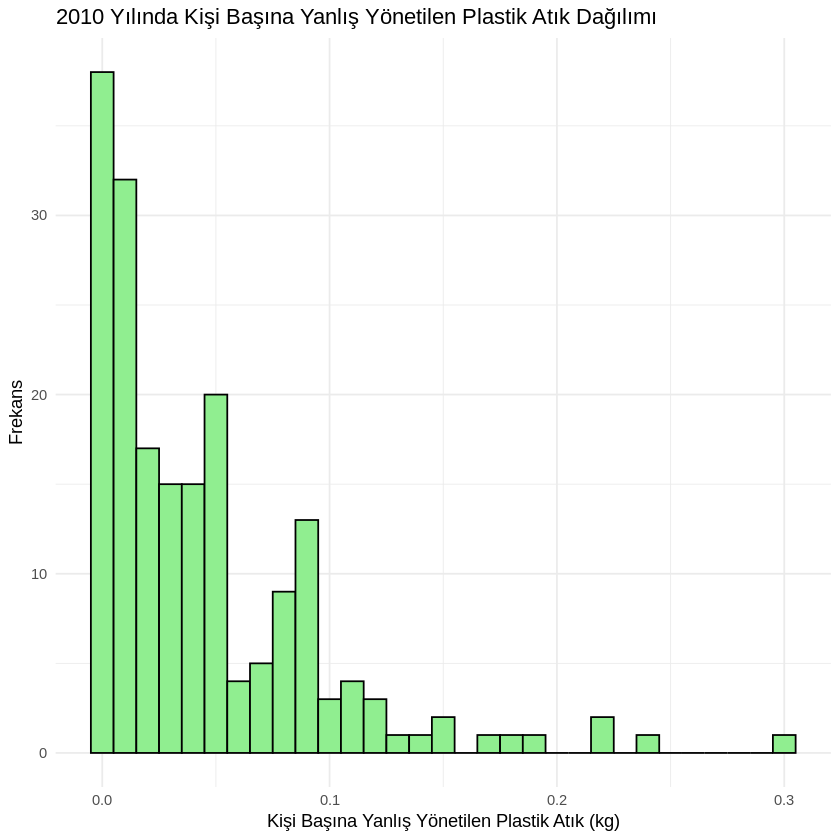

In [38]:
# Gerekli kütüphaneleri yükle (eğer daha önce yüklenmediyse)
library(dplyr)
library(ggplot2)

# Eksik değerleri filtreleyerek kişi başına plastik atık sütunu üzerinde çalışmayı sağlayın
plastic_waste <- plastic_waste %>% filter(!is.na(PlasticWastePerCapita_2010))

# Kıtalar bazında kişi başına plastik atık dağılımını gösteren histogram
ggplot(data = plastic_waste, aes(x = PlasticWastePerCapita_2010)) +
  geom_histogram(binwidth = 0.05, fill = "skyblue", color = "black") +
  labs(
    title = "2010 Yılında Kıtalar Bazında Kişi Başına Düşen Plastik Atık Dağılımı",
    x = "Kişi Başına Plastik Atık (kg)",
    y = "Frekans"
  ) +
  theme_minimal() +
  facet_wrap(~ Continent)

# Başka bir sayısal değişken için histogram (MismanagedPlasticWastePerCap)
plastic_waste <- plastic_waste %>% filter(!is.na(MismanagedPlasticWastePerCap))

ggplot(data = plastic_waste, aes(x = MismanagedPlasticWastePerCap)) +
  geom_histogram(binwidth = 0.01, fill = "lightgreen", color = "black") +
  labs(
    title = "2010 Yılında Kişi Başına Yanlış Yönetilen Plastik Atık Dağılımı",
    x = "Kişi Başına Yanlış Yönetilen Plastik Atık (kg)",
    y = "Frekans"
  ) +
  theme_minimal()


- Pick a single categorical variable and make a bar plot.

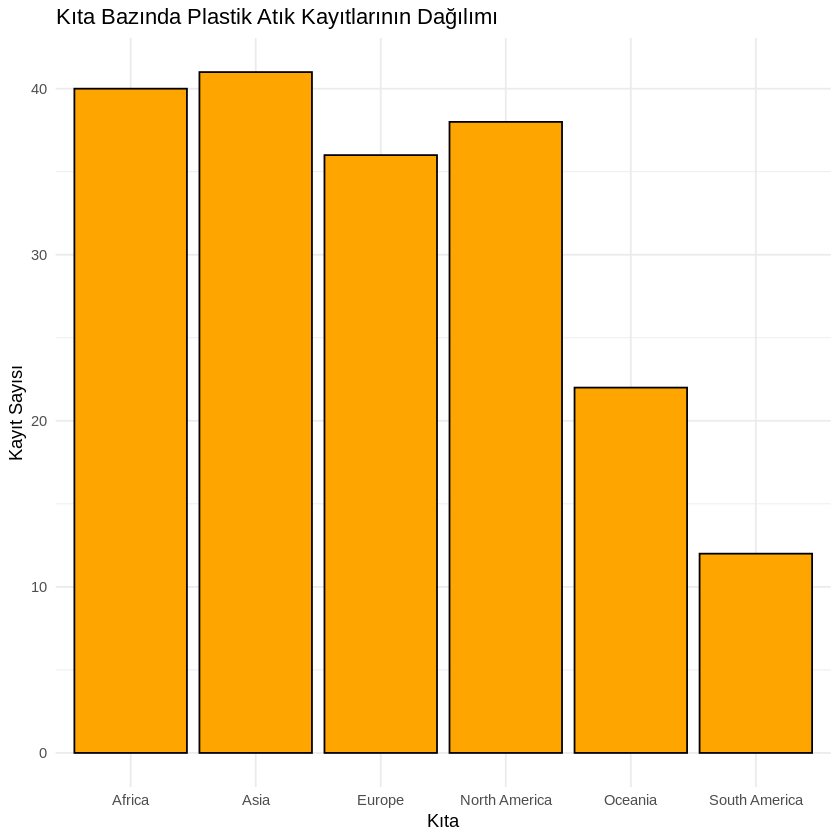

In [39]:
# Gerekli kütüphaneleri yükleyin
library(dplyr)
library(ggplot2)

# "Continent" değişkenine göre bar grafiği oluştur
ggplot(data = plastic_waste, aes(x = Continent)) +
  geom_bar(fill = "orange", color = "black") +
  labs(
    title = "Kıta Bazında Plastik Atık Kayıtlarının Dağılımı",
    x = "Kıta",
    y = "Kayıt Sayısı"
  ) +
  theme_minimal()


- Pick a numerical variable and a categorical variable. Make a visualisation to examine the relationship between two different types variables.


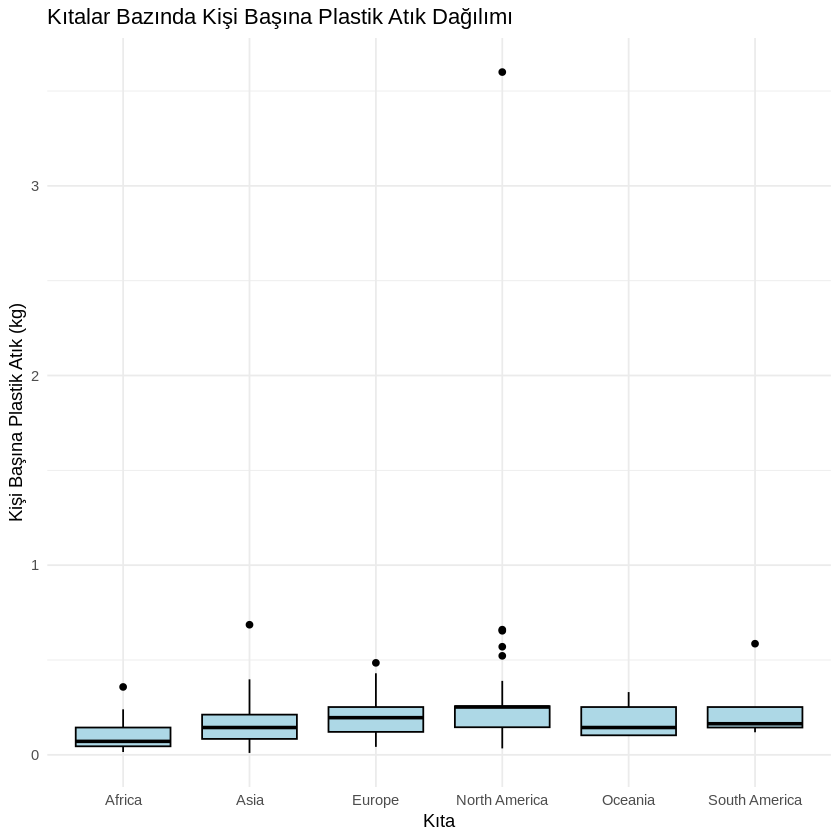

In [40]:
# Gerekli kütüphaneleri yükleyin
library(dplyr)
library(ggplot2)

# "PlasticWastePerCapita_2010" ve "Continent" değişkenleri arasındaki ilişkiyi gösteren kutu grafiği
ggplot(data = plastic_waste, aes(x = Continent, y = PlasticWastePerCapita_2010)) +
  geom_boxplot(fill = "lightblue", color = "black") +
  labs(
    title = "Kıtalar Bazında Kişi Başına Plastik Atık Dağılımı",
    x = "Kıta",
    y = "Kişi Başına Plastik Atık (kg)"
  ) +
  theme_minimal()


## Exercise 4 (40 pts)

- Visualize the relationship between plastic waste per capita and mismanaged plastic waste per capita using a scatterplot. Describe the relationship.

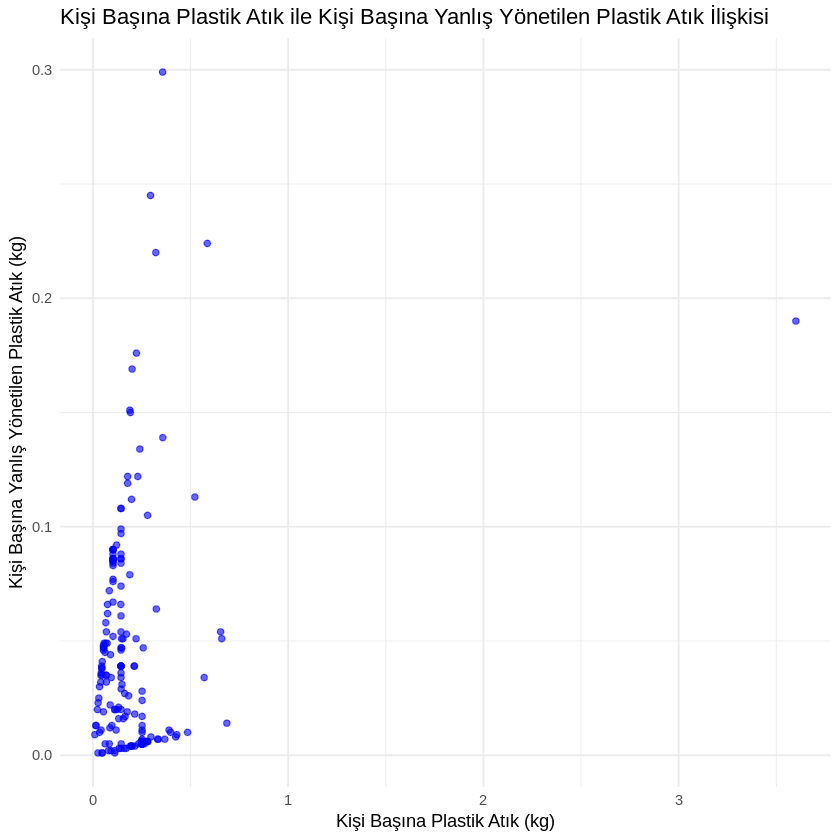

In [41]:
# Gerekli kütüphaneleri yükle (eğer daha önce yüklenmediyse)
library(ggplot2)

# Scatterplot (saçılma grafiği) oluştur
ggplot(data = plastic_waste, aes(x = PlasticWastePerCapita_2010, y = MismanagedPlasticWastePerCap)) +
  geom_point(color = "blue", alpha = 0.6) + # Noktaları göster
  labs(
    title = "Kişi Başına Plastik Atık ile Kişi Başına Yanlış Yönetilen Plastik Atık İlişkisi",
    x = "Kişi Başına Plastik Atık (kg)",
    y = "Kişi Başına Yanlış Yönetilen Plastik Atık (kg)"
  ) +
  theme_minimal()


Saçılma grafiğinde her bir nokta bir ülkeyi temsil ediyor ve kişi başına düşen plastik atık ile yanlış yönetilen plastik atık arasındaki ilişkiyi gösteriyor. Bu grafikte şunları söyleyebiliriz:

**Pozitif İlişki:** Eğer noktalar sağa ve yukarı doğru bir eğilim gösteriyorsa, kişi başına plastik atık miktarı arttıkça, yanlış yönetilen plastik atık miktarının da arttığını düşünebiliriz. Yani, daha fazla plastik tüketen ülkeler, genellikle daha fazla yönetim sorunu yaşıyor olabilir.

**Dağılım:** Eğer noktalar grafikte geniş bir alana yayılıyorsa, bu, değişkenler arasında güçlü bir bağlantı olmadığını gösterebilir. Örneğin, bazı ülkeler daha az plastik üretmesine rağmen yönetim sorunları yaşayabilirken, bazılarında bu sorun daha az olabilir.

**Aykırı Değerler:** Grafikte diğer noktalardan uzak olan bazı noktalar, farklı bir durum sergileyen ülkeleri gösterebilir. Bu ülkeler, plastik atık yönetimi konusunda sıra dışı durumlar sergiliyor olabilir.

Kısacası, bu grafikten yola çıkarak plastik atık üretimi ve yönetimi arasındaki ilişkiyi daha iyi anlamaya çalışabiliriz ve bu, çevre politikalarını şekillendirmede faydalı olabilir.

- Color the points in the scatterplot by continent. Does there seem to be any clear distinctions between continents with respect to how plastic waste per capita and mismanaged plastic waste per capita are associated?

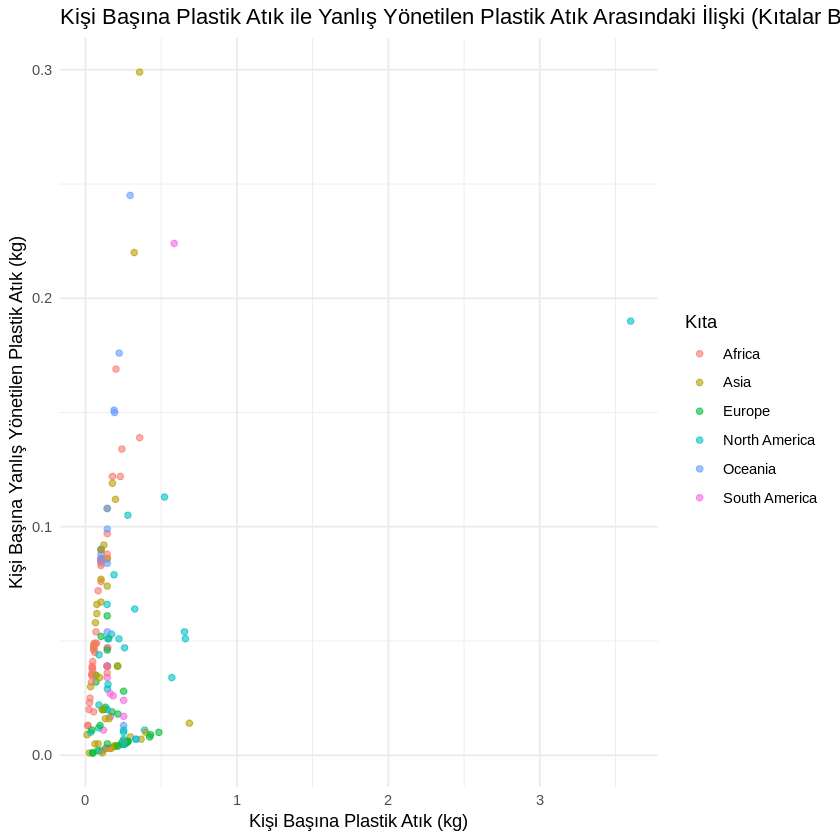

In [42]:
# Kıtaları renklendirerek scatterplot oluştur
ggplot(data = plastic_waste, aes(x = PlasticWastePerCapita_2010, y = MismanagedPlasticWastePerCap, color = Continent)) +
  geom_point(alpha = 0.6) + # Noktaların saydamlığını artırarak yoğunlukları görselleştirin
  labs(
    title = "Kişi Başına Plastik Atık ile Yanlış Yönetilen Plastik Atık Arasındaki İlişki (Kıtalar Bazında)",
    x = "Kişi Başına Plastik Atık (kg)",
    y = "Kişi Başına Yanlış Yönetilen Plastik Atık (kg)",
    color = "Kıta"
  ) +
  theme_minimal()


Scatterplot'u kıtalara göre renklendirdiğimizde, kişi başına düşen plastik atık ile yanlış yönetilen plastik atık arasındaki ilişki daha belirgin hale geliyor. Avrupa ve Kuzey Amerika gibi gelişmiş kıtalarda kişi başına plastik atık miktarı yüksekken, yanlış yönetilen atık oranı daha düşük olabilir. Bu durum, gelişmiş atık yönetim sistemleriyle ilişkilendirilebilir. Asya ve Afrika'da ise daha yüksek oranlarda yanlış yönetilen plastik atık gözlemlenebilir. Bu, altyapı yetersizliği ve atık yönetimindeki zorluklardan kaynaklanıyor olabilir. Genel olarak, kıtalar arasında belirgin bir farklılık, ekonomik gelişmişlik ve atık yönetimi politikalarının önemini ortaya koyuyor.

- Apart from coloring, how can you recreate your above plot by including the same visualization story ? Try to be creative as far as you can!

Renklendirme yerine, kıtaları farklı şekiller veya sembollerle (örneğin, daireler, üçgenler veya kareler) temsil ederek grafiği yeniden oluşturabilirsiniz. Bu, kıtaları ayırt etmeyi kolaylaştırır ve görselleştirmeye ilginç bir bakış açısı kazandırır. Ayrıca, her bir kıta için trend çizgileri ekleyerek kişi başına düşen plastik atık ile yanlış yönetilen plastik atık arasındaki genel eğilimleri gösterebiliriz. Kıtaları küçük grafikler (facet'ler) halinde sunarak ayrı ayrı karşılaştırmalar yapmak da faydalı olabilir. Son olarak, noktaların boyutunu nüfus gibi bir faktöre göre ölçeklendirmek, hem plastik atık miktarını hem de bu atıkların yönetimindeki zorlukları daha görsel ve etkileyici bir şekilde ortaya koyabilir. Bu yaklaşımlar, aynı hikayeyi daha zengin bir görsel dil ile anlatmak için yaratıcı yollar sunar.